In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv(r'S:\SUNNY PC\Elevate Labs\Datasets\breast-cancer.csv')

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
print(df.isna().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [5]:
print(df.sample(5))

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
528    918192         B       13.940         13.17           90.31      594.2   
276   8911230         B       11.330         14.16           71.79      396.6   
504    915186         B        9.268         12.87           61.49      248.7   
537    919812         B       11.690         24.44           76.37      406.4   
324  89511501         B       12.200         15.21           78.01      457.9   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
528          0.12480           0.09755        0.101000             0.066150   
276          0.09379           0.03872        0.001487             0.003333   
504          0.16340           0.22390        0.097300             0.052520   
537          0.12360           0.15520        0.045150             0.045310   
324          0.08673           0.06545        0.019940             0.016920   

     ...  radius_worst  texture_worst 

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
df = df.drop('id', axis=1)

In [10]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
df['diagnosis'] = df['diagnosis'].map({'M' : 1, "B" : 0})

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

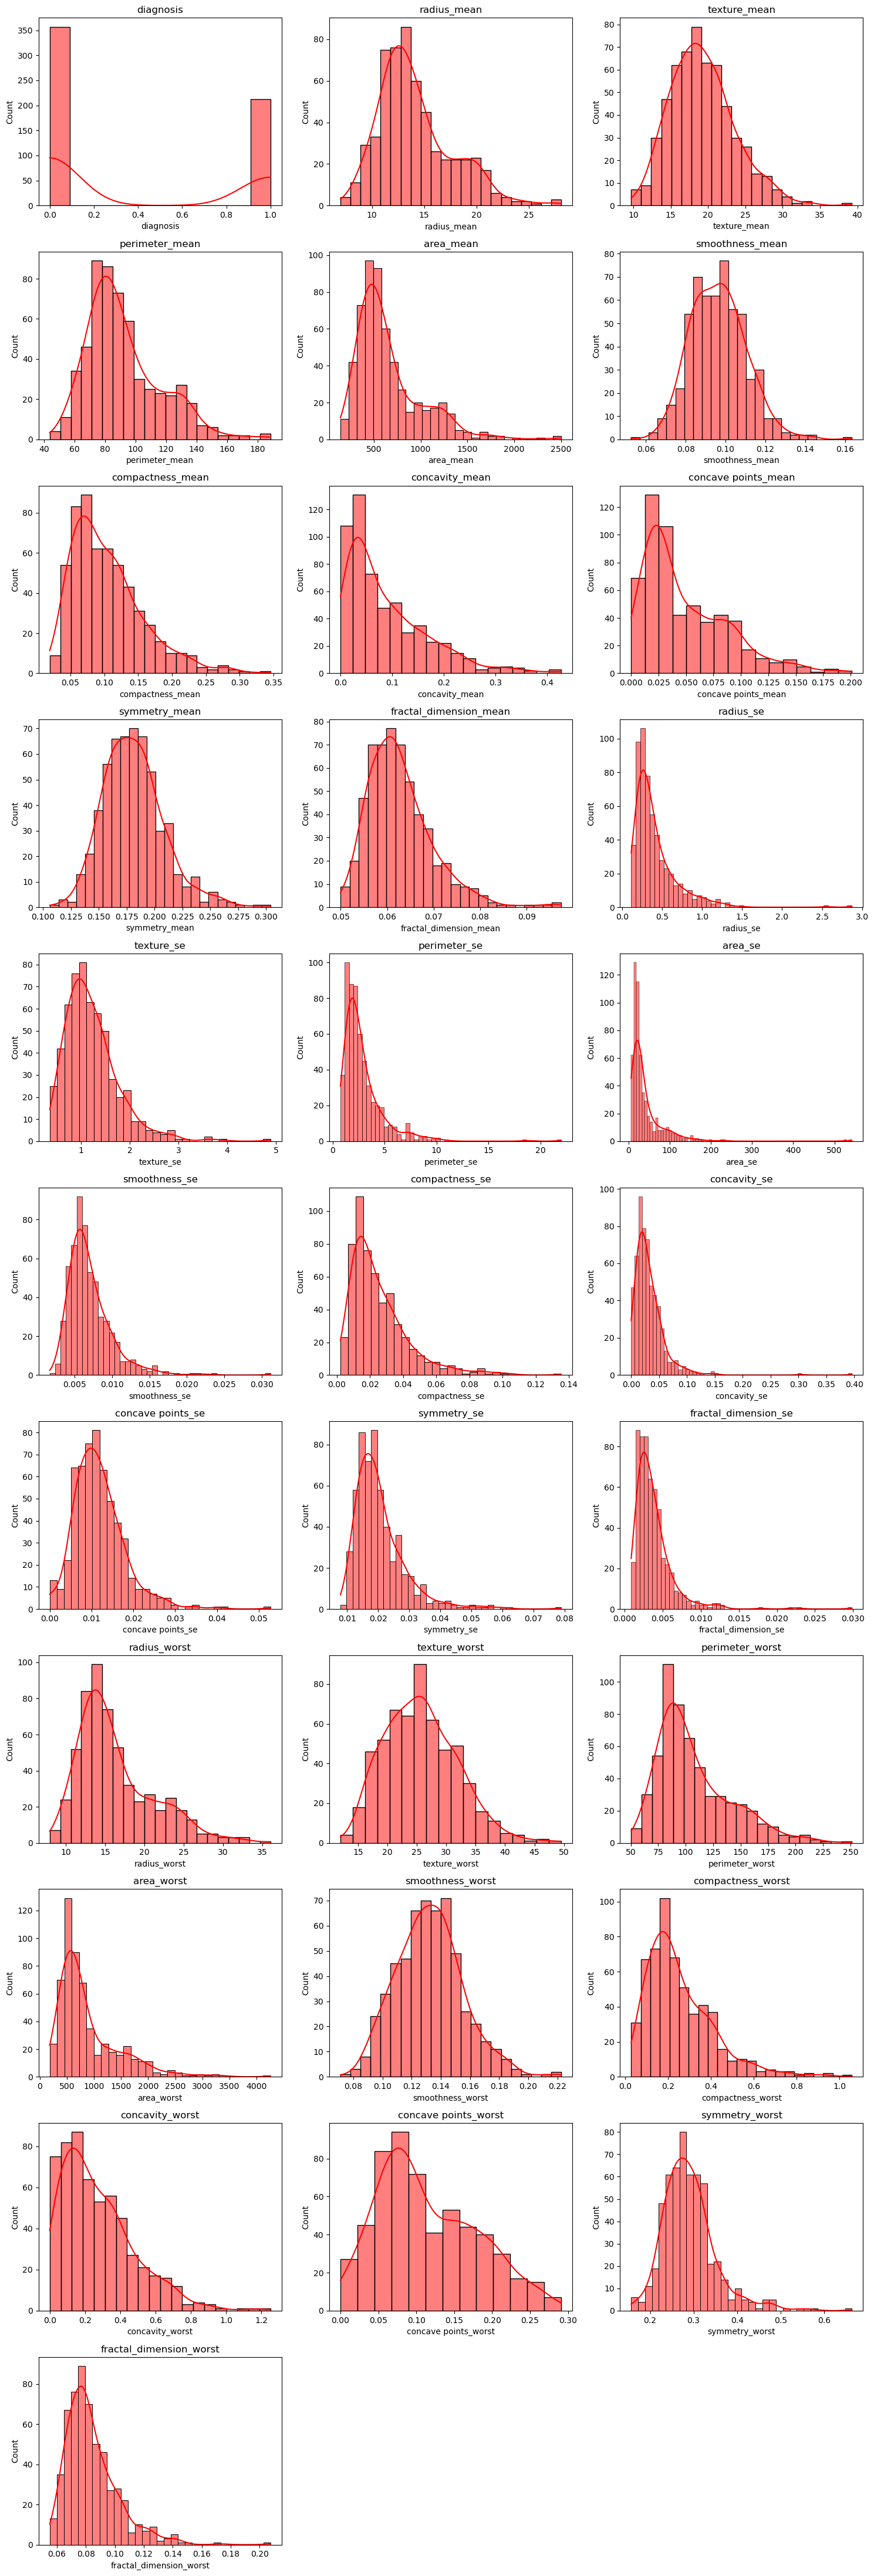

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine number of columns
num_cols = len(df.columns)

# Create subplots: adjust rows and columns as needed
cols = 3  # Number of columns in subplot grid
rows = (num_cols + cols - 1) // cols  # Calculate required rows

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()  # Flatten in case of multi-row layout

# Plot each column in its own subplot
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, color='r', ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
X = df.drop('diagnosis', axis=1)

y = df['diagnosis']

In [17]:
X.shape, y.shape

((569, 30), (569,))

In [18]:
from sklearnex import patch_sklearn
patch_sklearn()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [25]:
from sklearn.svm import SVC

print("=== Baseline SVM Models ===")

# Linear SVC

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_std, y_train)

# RBF SVC
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_std, y_train)

=== Baseline SVM Models ===


SVC(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_linear = svm_linear.predict(X_test_std)
acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear SVM accuracy: {acc_linear:.3f}")
print("Classification Report :\n", classification_report(y_test, y_pred_linear))

Linear SVM accuracy: 0.965
Classification Report :
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [27]:
y_pred_rbf = svm_rbf.predict(X_test_std)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF SVM accuracy: {acc_rbf:.3f}")
print("Classification Report :\n", classification_report(y_test, y_pred_rbf))

RBF SVM accuracy: 0.974
Classification Report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114




=== Cross-Validation Scores ===
Linear SVM CV: 0.963 (+/- 0.033)
RBF SVM CV: 0.976 (+/- 0.026)


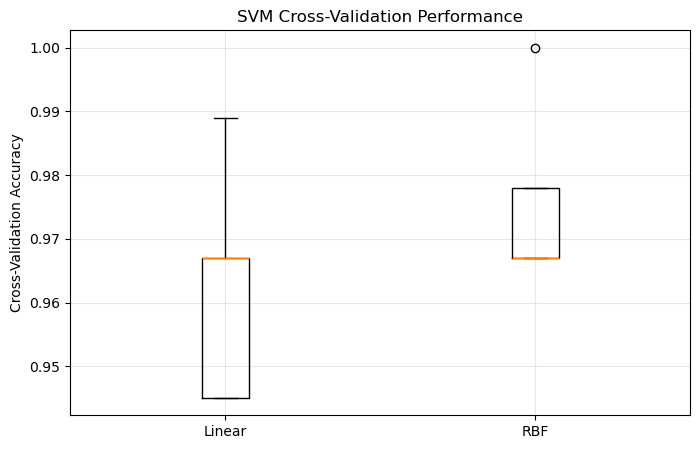

In [28]:
from sklearn.model_selection import cross_val_score

# 6) Cross-validation evaluation
print("\n=== Cross-Validation Scores ===")

cv_linear = cross_val_score(svm_linear, X_train_std, y_train, cv=5)
cv_rbf = cross_val_score(svm_rbf, X_train_std, y_train, cv=5)

print(f"Linear SVM CV: {cv_linear.mean():.3f} (+/- {cv_linear.std()*2:.3f})")
print(f"RBF SVM CV: {cv_rbf.mean():.3f} (+/- {cv_rbf.std()*2:.3f})")

# Plot CV scores
plt.figure(figsize=(8, 5))
plt.boxplot([cv_linear, cv_rbf], tick_labels=['Linear', 'RBF'])
plt.ylabel('Cross-Validation Accuracy')
plt.title('SVM Cross-Validation Performance')
plt.grid(True, alpha=0.3)
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV

# 7) Hyperparameter tuning with GridSearchCV
print("\n=== Hyperparameter Tuning ===")

# Define parameter grids
param_grid_linear = {
    'C': [0.1, 1, 10, 100]
}

param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Grid search for linear SVM
grid_linear = GridSearchCV(
    SVC(kernel='linear', random_state=42),
    param_grid_linear,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_linear.fit(X_train_std, y_train)

# Grid search for RBF SVM
grid_rbf = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    param_grid_rbf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_rbf.fit(X_train_std, y_train)

print(f"Best Linear SVM - C: {grid_linear.best_params_['C']}, CV Score: {grid_linear.best_score_:.3f}")
print(f"Best RBF SVM - C: {grid_rbf.best_params_['C']}, gamma: {grid_rbf.best_params_['gamma']}, CV Score: {grid_rbf.best_score_:.3f}")


=== Hyperparameter Tuning ===
Best Linear SVM - C: 0.1, CV Score: 0.969
Best RBF SVM - C: 1, gamma: scale, CV Score: 0.976



=== Test Set Performance ===
Best Linear SVM accuracy: 0.982
Best RBF SVM accuracy: 0.974


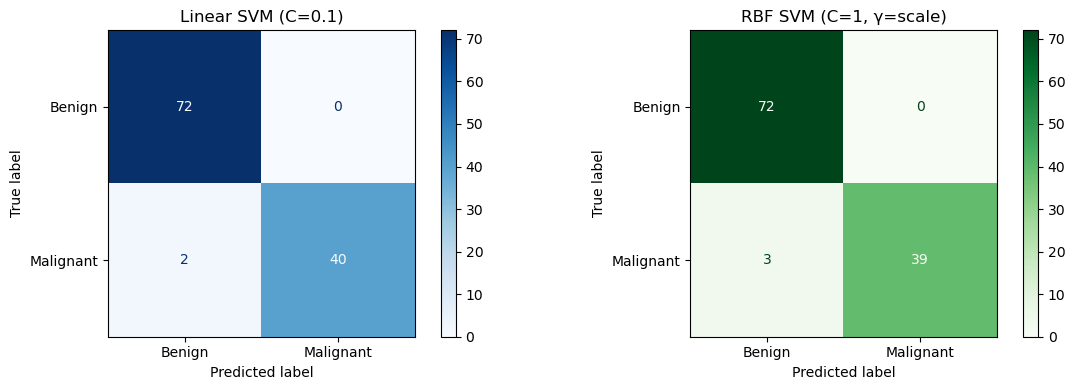

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 8) Evaluate best models on test set
best_linear = grid_linear.best_estimator_
best_rbf = grid_rbf.best_estimator_

y_pred_best_linear = best_linear.predict(X_test_std)
y_pred_best_rbf = best_rbf.predict(X_test_std)

acc_best_linear = accuracy_score(y_test, y_pred_best_linear)
acc_best_rbf = accuracy_score(y_test, y_pred_best_rbf)

print(f"\n=== Test Set Performance ===")
print(f"Best Linear SVM accuracy: {acc_best_linear:.3f}")
print(f"Best RBF SVM accuracy: {acc_best_rbf:.3f}")

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

cm_linear = confusion_matrix(y_test, y_pred_best_linear)
ConfusionMatrixDisplay(cm_linear, display_labels=['Benign', 'Malignant']).plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f'Linear SVM (C={grid_linear.best_params_["C"]})')

cm_rbf = confusion_matrix(y_test, y_pred_best_rbf)
ConfusionMatrixDisplay(cm_rbf, display_labels=['Benign', 'Malignant']).plot(ax=axes[1], cmap='Greens')
axes[1].set_title(f'RBF SVM (C={grid_rbf.best_params_["C"]}, γ={grid_rbf.best_params_["gamma"]})')

plt.tight_layout()
plt.show()


In [31]:
from sklearn.decomposition import PCA

# 9) 2D visualization using PCA projection
print("\n=== 2D Decision Boundary Visualization ===")

# Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_train_2d = pca.fit_transform(X_train_std)
X_test_2d = pca.transform(X_test_std)

print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.3f}")

# Train SVMs on 2D data
svm_2d_linear = SVC(kernel='linear', C=grid_linear.best_params_['C'], random_state=42)
svm_2d_rbf = SVC(kernel='rbf', C=grid_rbf.best_params_['C'], 
                 gamma=grid_rbf.best_params_['gamma'], random_state=42)

svm_2d_linear.fit(X_train_2d, y_train)
svm_2d_rbf.fit(X_train_2d, y_train)



=== 2D Decision Boundary Visualization ===
PCA explained variance ratio: [0.44593522 0.18545255]
Total variance explained: 0.631


SVC(C=1, random_state=42)

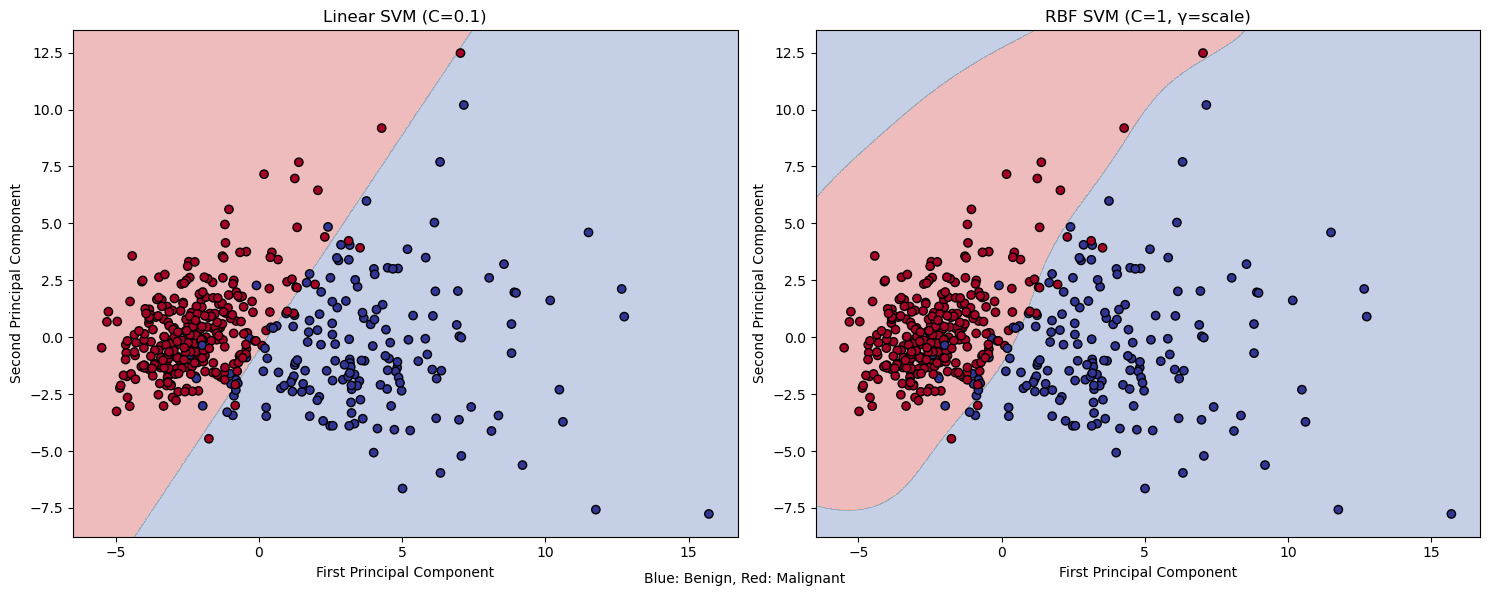

In [32]:
# 10) Plot decision boundaries
def plot_decision_boundary(svm_model, X_train, y_train, title, ax):
    # Create mesh
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict on mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = svm_model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolors='black')
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    ax.set_title(title)
    return scatter

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Linear SVM boundary
scatter1 = plot_decision_boundary(svm_2d_linear, X_train_2d, y_train, 
                                  f'Linear SVM (C={grid_linear.best_params_["C"]})', axes[0])

# RBF SVM boundary
scatter2 = plot_decision_boundary(svm_2d_rbf, X_train_2d, y_train,
                                  f'RBF SVM (C={grid_rbf.best_params_["C"]}, γ={grid_rbf.best_params_["gamma"]})', axes[1])

# Add legend
plt.figtext(0.5, 0.02, 'Blue: Benign, Red: Malignant', ha='center', fontsize=10)
plt.tight_layout()
plt.show()



=== Final Performance Summary ===


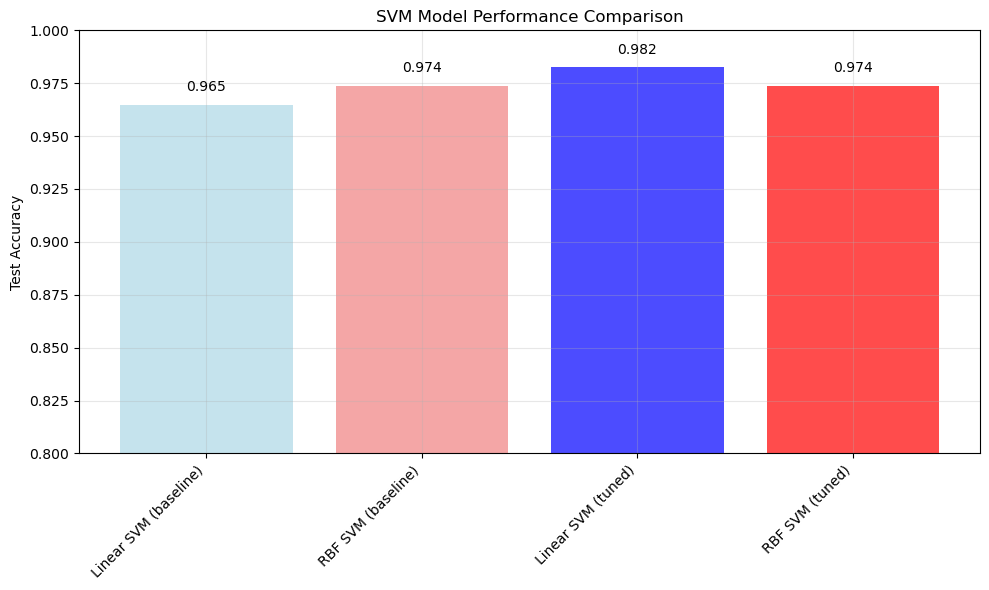


Best performing model: Linear SVM
Test accuracy: 0.982

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        72
   Malignant       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [34]:
# 11) Performance comparison summary
print("\n=== Final Performance Summary ===")

models = ['Linear SVM (baseline)', 'RBF SVM (baseline)', 'Linear SVM (tuned)', 'RBF SVM (tuned)']
accuracies = [acc_linear, acc_rbf, acc_best_linear, acc_best_rbf]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['lightblue', 'lightcoral', 'blue', 'red'], alpha=0.7)
plt.ylabel('Test Accuracy')
plt.title('SVM Model Performance Comparison')
plt.ylim(0.8, 1.0)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{acc:.3f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

# Best model details
best_model = best_rbf if acc_best_rbf > acc_best_linear else best_linear
print(f"\nBest performing model: {'RBF' if acc_best_rbf > acc_best_linear else 'Linear'} SVM")
print(f"Test accuracy: {max(acc_best_rbf, acc_best_linear):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, best_rbf.predict(X_test_std) if acc_best_rbf > acc_best_linear else best_linear.predict(X_test_std), 
                          target_names=['Benign', 'Malignant']))
